<a href="https://colab.research.google.com/github/YkRic/MVPIII/blob/informe/MVP_III_JessicaPecho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP Pós Data Science - PUC Rio - Sprint 3**

* Nome: Jessica Margarita Palomares Pecho
* Data: Julho e Setembro de 2023

# **Introdução e objetivo**

No pais vizinho Perú, a entidade encarregada de autorizar a participação dos atletas em eventos nacionais e internacionais é o Instituto Peruano del Deporte(IPD). O IPD publicou neste ano 2023 um dataset referente as participações de atletas das diferentes Federações Desportivas Nacionais e Associações Desportivas, em eventos desportivos internacionais autorizados entre os anos 2014 - 2022. Nesse link: https://www.datosabiertos.gob.pe/dataset/participaci%C3%B3n-de-deportistas-en-eventos-deportivos-internacionales-autorizados-por-el-ipd

A partir dos dados disponibilizados sobre as participações dos atletas em eventos internacionais foram realizadas as seguintes perguntas de pesquisa que pretende-se reponder com a elaboração do presente trabalho.



*   Quantas medalhas o Peru obtém na participação em competições internacionais?
*   Quais são os esportes que mais participaram nas competições internacionais?
*   Qué esportes consigueram conquistar mais medalhas em competições internacionais?
* Qué esportes receberam maior apoio economico do governo dentre os anos 2014 e 2022?







## **Estrutura do Trabalho**

Para elaboração deste MVP, optou-se pela utilização da ferramenta Microsoft Azure. *** TODO Especificamente O Databricks é uma plataforma de análise e processamento de big data, baseada no Apache Spark. O fluxo de trabalho foi estruturado a partir do Workspace da ferramenta e o desenvolvimento se baseou em Notebook (PYTHON e SQL), para as etapas de ETL e para a estruturação do banco de dados e views (incluindo o catálogo no Hive Metastore, integrado ao próprio Databricks).
*texto en cursiva*

Diante do exposto, este trabalho está dividido nas seguintes seções:

1. Introdução
2. Seção 0: Configuração da nuvem - Datawarehouse
3. Seção I: Obtenção e Tratamento Inicial dos Dados
4. Seção II: Azure Data Studio e Catálogo de Dados
5. Seção III: Análise dos Dados
6. Seção IV: Conclusão






# **Seção 0: Configuração da Nuvem Azure - Data Warehouse**

## Azure Data Factory

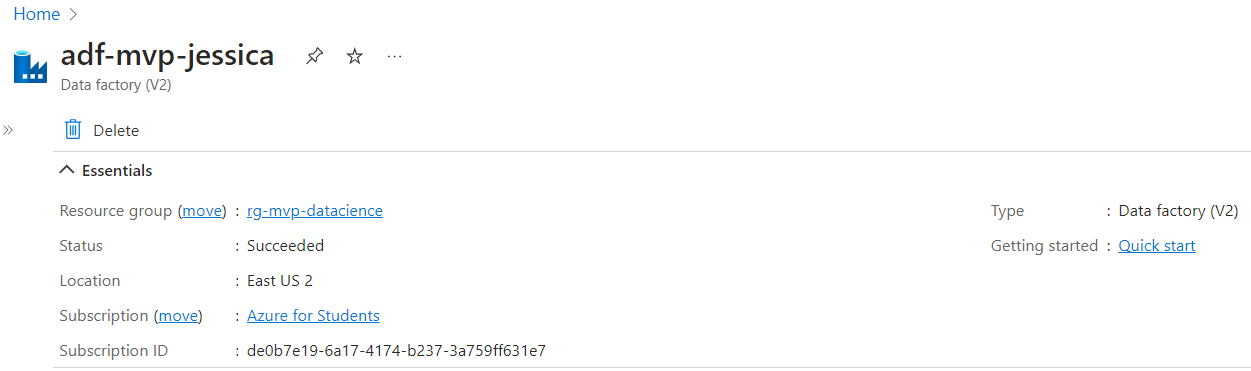

## Strorage Account

Nome da Storage Account: dlsmvpjessicapecho

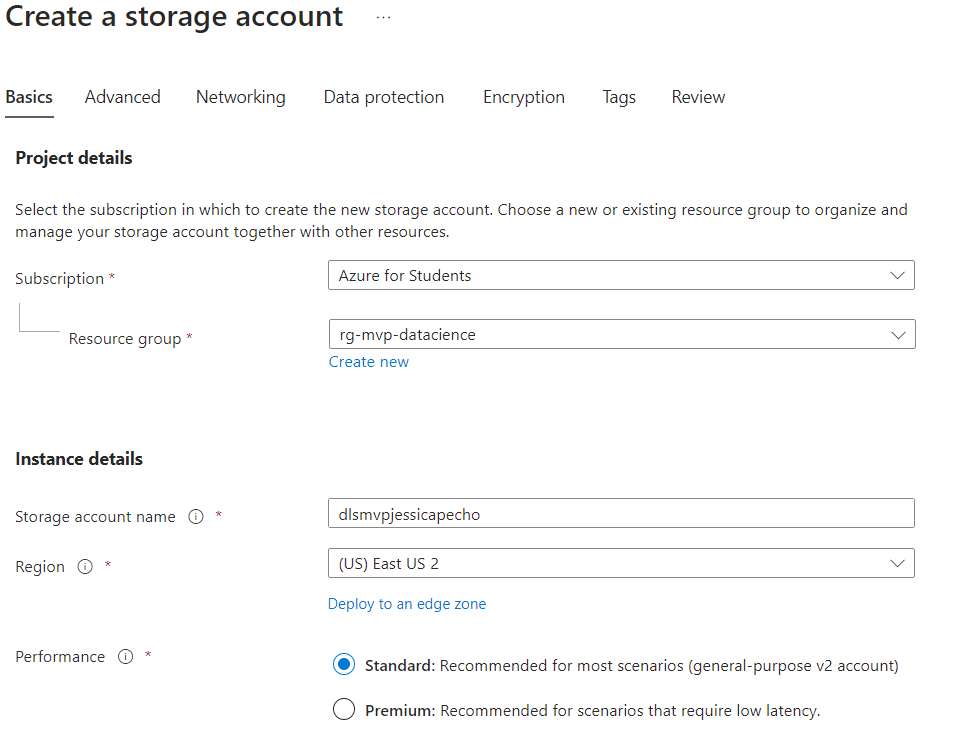

## Container
Foi criado o container **deportfiles** onde foi feito o upload dos arquivos .cvs e .xlsx que foram extraidos do respositório aberto do goberno Peruano, detalhados na seção coleta de dados.



*   O arquivo *atletas_inscritos_ipd.csv* refere-se aos atletas inscritos no Instituto Peruano de Deportes e montos que cada um recebeu do IPD entre os anos 2013-2023
*    O arquivo *participações.csv* refere-se as participações dos atletas em eventos deportivos entre os anos 2014 e 2023
*    O arquivo *ubigeos.xlsx* refere-se aos códigos dos estados e cidades de acordo como é codificado pelo Instituto Nacional de Estadística do Peru. Para o desenvolvimento de meu trabalho ajudou para fazer a relação do atleta e local de procedencia.

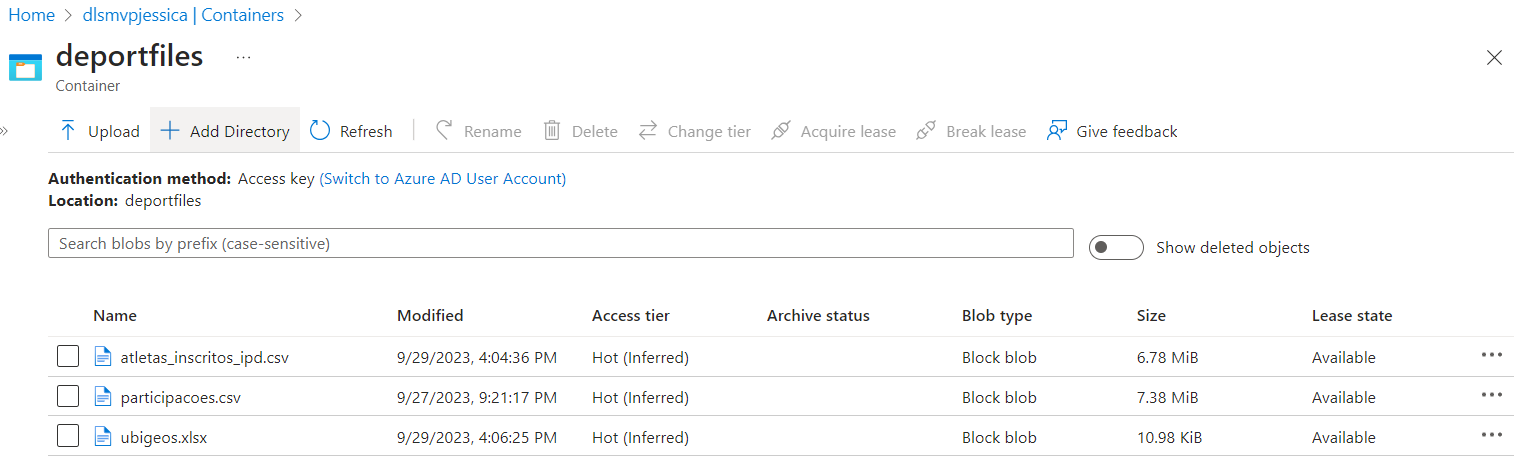

# **Seção 1: Obtenção e tratamento Inicial dos Dados**

Os dados foram coletados da Plataforma Nacional de dados Abiertos - Peru, no total foram recuperados 3 arquivos:

1.  Participação dos atletas em competições esportivas entre 2014-2022 , https://www.datosabiertos.gob.pe/dataset/participaci%C3%B3n-de-deportistas-en-eventos-deportivos-internacionales-autorizados-por-el-ipd,
esse repositorio foi o principal onde se obteve o data-lake das participaciones dos atletas peruanos em competicoes internacionais
2. Atletas cadastrados no Instituto Peruano do deporte(IPD) que reciberam apoio economico desde o 2013 - 2023
https://www.datosabiertos.gob.pe/dataset/deportistas-beneficiados-por-el-programa-de-apoyo-al-deportista-instituto-peruano-del

3. Codigos referentes as cidades , UF, etc. foram selecionados do seguinte link:
https://www.datosabiertos.gob.pe/dataset/codigos-equivalentes-de-ubigeo-del-peru




> As etapas de obtenção e tratamento dos dados (incluindo análise de qualidade e adequações) serão realizadas por meio da linguagem Python, utilizando-se, principalmente, as bibliotecas Pandas e datetime.

## Qualidade dos Dados

Os dados foram disponivilizados pelo goberno Peruano com o intuito de empolgar aos cidadaos participarem da **primeira dataton** promovida pelo governo. No total foram disponivilizados [180 respositorios](https://www.datosabiertos.gob.pe/search/field_topic/expr%C3%A9sate-per%C3%BA-con-datos-1466/type/dataset?sort_by=changed) de distintos tópicos como: Gobernabilidad, Educaçãom Desarrollo Social, Agua e Saneamento, Ciencia y Tecnologia, entre outros. Portanto, de um modo geral, auditorias e consistências (em termos de qualidade e formato dos dados) frequentes. Além disso, acredita-se que os dados coletados para o presente trabalho já atendem a alguns requisitos de qualidade (por exemplo, valores não-negativos) diretamente na fonte.

> No entanto, para uniformização e qualidade dos dados, serão considerados, principalmente, os seguintes aspectos:

 >- Eliminação das tuplas com dados NaN/vazios/missings (especialmente nos dados de carga).

 >- Alteração do tipo da coluna de dados referentes às datas de medição para o formato DATE.

## Importação de Bibliotecas
Inicialmente, iremos importar e avaliar utilizando a biblioteca Pandas, para fazer uma rápida análise exploratória, os dataset de "entrada".

In [ ]:
# Importando bibliotecas e pacotes que poderão ser utilizados na análise

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from google.colab import drive

##  Participação dos atletas em eventos internacionais
A informação publicada no site corresponde à lista de participações de atletas das diferentes Federações Esportivas Nacionais e Associações Esportivas, em eventos desportivos internacionais autorizados pelo Instituto Peruano de Deporte (IPD).

O IPD autoriza através de Resoluções a participação de atletas em eventos esportivos internacionais que ocorram fora do país ou que tenham sede no Peru.

Estas provas fazem parte do calendário desportivo internacional, bem como do calendário federativo estabelecido por cada organização esportiva durante o período estabelecido.

No campo “POSIÇÃO”, determina a posição alcançada pelo atleta em sua participação no evento esportivo internacional; Os lugares 1, 2 e 3 equivalem às medalhas de Ouro, Prata e Bronze respectivamente.

Fonte: [O dataset está disponível no site Plataforma Nacional de Datos Abiertos]( https://www.datosabiertos.gob.pe/dataset/participaci%C3%B3n-de-deportistas-en-eventos-deportivos-internacionales-autorizados-por-el-ipd).

**Informações sobre os atributos:**

1. **fecha_corte** - Dia em que o conjunto de dados foi gerado.
2. **item** - número correlativo
3. **federacion** - Federação Esportiva Nacional ou Associação Esportiva que regista a participação no evento desportivo internacional.
4. **Evento** - Nome do evento esportivo internacional onde está registrada a participação do atleta.
5. **pais_evento** - País onde acontece o evento esportivo internacional.
6. **ciudad_evento** - Cidade do país onde acontece um evento esportivo internacional.
7. **fecha_inicio** - Data de início do evento esportivo internacional.
8. **fecha_fin** -  Data final do evento esportivo internacional.
9. **Nombres completos del deportista.** Nomes completos do atleta.
10. **puestos** Posição alcançada pelo atleta no evento esportivo internacional em que participou.
11. **especialidad** Modalidade ou categoria específica em que o atleta participou do evento esportivo internacional.
12. **colectivo** Tipo de grupo que define a participação dos atletas no evento esportivo internacional.
13. **departamento** Departamento onde está localizada a sede do IPD.
14. **provincia** Província onde está localizada a sede do IPD.
15. **distrito** Distrito onde está localizada a sede do IPD.
16. **ubigeo** Distrito onde está localizada a sede do IPD.
17. **fecha_publicacion** Dia em que o dataset foi publicado.

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Inicialmente é realizado a carga do dataset. O arquivo csv se encontra no meu repositório GitHub.

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/YkRic/MVPIII/dados/data_ParticipacionEventosDeportivosInternacionales_0.csv"

# Cabeçalho das colunas
colunas = ['fecha_corte',
           'item',
           'federacion',
           'evento',
           'pais_evento',
           'ciudad_evento',
           'fecha_inicio',
           'fecha_fin',
           'deportista',
           'puesto',
           'especialidad',
           'colectivo',
           'departamento',
           'provincia',
           'distrito',
           'ubigeo',
           'fecha_publicacion']

# Lê o arquivo utilizando as colunas informadas, exluindo a primeira fila que contem o cabeçlho dos dados
dataset = pd.read_csv(url, skiprows=1, names=colunas, delimiter=';', encoding='unicode_escape')
dataset = pd.DataFrame(dataset)
dataset.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
fecha_corte,20230817,20230817,20230817,20230817,20230817,20230817,20230817,20230817,20230817,20230817
item,1,2,3,4,5,6,7,8,9,10
federacion,ACTIVIDADES SUBACUATICAS,ACTIVIDADES SUBACUATICAS,ACTIVIDADES SUBACUATICAS,ACTIVIDADES SUBACUATICAS,ACTIVIDADES SUBACUATICAS,ACTIVIDADES SUBACUATICAS,ACTIVIDADES SUBACUATICAS,ACTIVIDADES SUBACUATICAS,ACTIVIDADES SUBACUATICAS,ACTIVIDADES SUBACUATICAS
evento,VIII CAMPEONATO PANAMERICANO DE APNEA INDOOR,III JUEGOS BOLIVARIANOS DE PLAYA IQUIQUE 2016,VIII CAMPEONATO PANAMERICANO DE APNEA INDOOR,VIII CAMPEONATO PANAMERICANO DE APNEA INDOOR,VIII CAMPEONATO PANAMERICANO DE APNEA INDOOR,III JUEGOS BOLIVARIANOS DE PLAYA IQUIQUE 2016,I CAMPEONATO OPEN INTERNACIONAL DE APNEA INDOOR,I CAMPEONATO OPEN INTERNACIONAL DE APNEA INDOOR,VIII CAMPEONATO PANAMERICANO DE APNEA INDOOR,III JUEGOS BOLIVARIANOS DE PLAYA IQUIQUE 2016
pais_evento,ECUADOR,CHILE,ECUADOR,ECUADOR,ECUADOR,CHILE,ECUADOR,ECUADOR,ECUADOR,CHILE
ciudad_evento,GUAYAQUIL,IQUIQUE,GUAYAQUIL,GUAYAQUIL,GUAYAQUIL,IQUIQUE,GUAYAQUIL,GUAYAQUIL,GUAYAQUIL,IQUIQUE
fecha_inicio,20221005,20161124,20221005,20221005,20221005,20161124,20221005,20221005,20221005,20161124
fecha_fin,20221011,20161203,20221011,20221011,20221011,20161203,20221010,20221010,20221011,20161203
deportista,CANAHUIRE QUISPE ANGELA BEATRIZ,CARBAJAL CASTILLO VICTOR MANUEL,CASAPIA KOCCHINFOC MARIA PIA,COLL ABAD FRANCISCO JAVIER,COLL ABAD FRANCISCO JAVIER,CORBATTO LINALE PIERO PAOLO,CUNZA MUNGUIA ANGELY DEYANIRA MARIEL,CUNZA MUNGUIA ANGELY DEYANIRA MARIEL,ENRIQUEZ OCHOA EMIL RAYIL,ESPINOZA AYAIPOMA MARIO ERNESTO
puesto,10,3,9,15,19,3,1,2,4,3


In [ ]:
# Verificando dimensões do dataset (quantos atributos e instâncias existem)
dataset.shape

(41261, 17)

In [ ]:
# Removi as colunas "fecha_corte", "item", "departamento", "provincia", "distrito", "ubigeo", "fecha_publicacion", porque elas não tem muita relevância
# fecha_corte: data em que foi gerado o dataset
# item: numero de fila, o dataframe já faz essa contagem
# "departamento", "provincia" e "distrito": é o local onde encontra-se ubicado o IPD, sendo que tem apenas um local todas as filas são iguais em cada uma das colunas
# "ubigeo" : código de ubicação do local do IPD, aqui também todas as filas são iguais
# "fecha_publicação": é a data em que foi publicado o dataset

participacoes = dataset.drop(columns = ["fecha_corte", "item", "departamento", "provincia", "distrito", "ubigeo", "fecha_publicacion"])

In [ ]:
participacoes.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
federacion,ACTIVIDADES SUBACUATICAS,ACTIVIDADES SUBACUATICAS,ACTIVIDADES SUBACUATICAS,ACTIVIDADES SUBACUATICAS,ACTIVIDADES SUBACUATICAS,ACTIVIDADES SUBACUATICAS,ACTIVIDADES SUBACUATICAS,ACTIVIDADES SUBACUATICAS,ACTIVIDADES SUBACUATICAS,ACTIVIDADES SUBACUATICAS
evento,VIII CAMPEONATO PANAMERICANO DE APNEA INDOOR,III JUEGOS BOLIVARIANOS DE PLAYA IQUIQUE 2016,VIII CAMPEONATO PANAMERICANO DE APNEA INDOOR,VIII CAMPEONATO PANAMERICANO DE APNEA INDOOR,VIII CAMPEONATO PANAMERICANO DE APNEA INDOOR,III JUEGOS BOLIVARIANOS DE PLAYA IQUIQUE 2016,I CAMPEONATO OPEN INTERNACIONAL DE APNEA INDOOR,I CAMPEONATO OPEN INTERNACIONAL DE APNEA INDOOR,VIII CAMPEONATO PANAMERICANO DE APNEA INDOOR,III JUEGOS BOLIVARIANOS DE PLAYA IQUIQUE 2016
pais_evento,ECUADOR,CHILE,ECUADOR,ECUADOR,ECUADOR,CHILE,ECUADOR,ECUADOR,ECUADOR,CHILE
ciudad_evento,GUAYAQUIL,IQUIQUE,GUAYAQUIL,GUAYAQUIL,GUAYAQUIL,IQUIQUE,GUAYAQUIL,GUAYAQUIL,GUAYAQUIL,IQUIQUE
fecha_inicio,20221005,20161124,20221005,20221005,20221005,20161124,20221005,20221005,20221005,20161124
fecha_fin,20221011,20161203,20221011,20221011,20221011,20161203,20221010,20221010,20221011,20161203
deportista,CANAHUIRE QUISPE ANGELA BEATRIZ,CARBAJAL CASTILLO VICTOR MANUEL,CASAPIA KOCCHINFOC MARIA PIA,COLL ABAD FRANCISCO JAVIER,COLL ABAD FRANCISCO JAVIER,CORBATTO LINALE PIERO PAOLO,CUNZA MUNGUIA ANGELY DEYANIRA MARIEL,CUNZA MUNGUIA ANGELY DEYANIRA MARIEL,ENRIQUEZ OCHOA EMIL RAYIL,ESPINOZA AYAIPOMA MARIO ERNESTO
puesto,10,3,9,15,19,3,1,2,4,3
especialidad,APNEA ESTÁTICA,PESCA SUBMARINA,APNEA ESTÁTICA,APNEA DINAMICA,APNEA ESTÁTICA,PESCA SUBMARINA,APNEA ESTÁTICA,APNEA DINAMICA,APNEA ESTÁTICA,PESCA SUBMARINA
colectivo,Individual,Mixta,Individual,Individual,Individual,Mixta,Individual,Individual,Individual,Mixta


In [ ]:
# Verificando os tipos de coluna do dataframe
participacoes.dtypes

federacion       object
evento           object
pais_evento      object
ciudad_evento    object
fecha_inicio      int64
fecha_fin         int64
deportista       object
puesto            int64
especialidad     object
colectivo        object
dtype: object

In [ ]:
# contabilizamos a quantidade de dados null por cada coluna
participacoes.isnull().sum()

federacion       0
evento           0
pais_evento      0
ciudad_evento    0
fecha_inicio     0
fecha_fin        0
deportista       0
puesto           0
especialidad     0
colectivo        0
dtype: int64

In [ ]:
# Alterando o tipo da coluna "fecha_inicio" e "fecha_fin"  para Data
participacoes['fecha_inicio'] = pd.to_datetime(participacoes['fecha_inicio'].astype(str), format='%Y%m%d')
participacoes['fecha_fin'] = pd.to_datetime(participacoes['fecha_fin'].astype(str), format='%Y%m%d')

In [ ]:
# Reordenando o dataframe, pela coluna fecha_inicio (em ordem crescente)
participacoes=participacoes.sort_values(by='fecha_inicio', ascending=True)
participacoes.head(20)

,federacion,evento,pais_evento,ciudad_evento,fecha_inicio,fecha_fin,deportista,puesto,especialidad,colectivo
39561,VELA,CAMPEONATO NORTEAMERICANO DE OPTIMIST 2014,MEXICO,PUERTO VALLARTA,2014-07-09,2014-07-16,VAN OORDT LOPEZ MARIA PIA,19,OPTIMIST,Mixta
38759,VELA,CAMPEONATO NORTEAMERICANO DE OPTIMIST 2014,MEXICO,PUERTO VALLARTA,2014-07-09,2014-07-16,CHIARELLA SALAS FLORENCIA,17,OPTIMIST,Mixta
39665,VELA,CAMPEONATO NORTEAMERICANO DE OPTIMIST 2014,MEXICO,PUERTO VALLARTA,2014-07-09,2014-07-16,VIALE AGUIRRE STEFANO,42,OPTIMIST,Mixta
39506,VELA,CAMPEONATO NORTEAMERICANO DE OPTIMIST 2014,MEXICO,PUERTO VALLARTA,2014-07-09,2014-07-16,TUDELA BALLON DIANA MARIA,21,OPTIMIST,Mixta
39696,VELA,CAMPEONATO NORTEAMERICANO DE OPTIMIST 2014,MEXICO,PUERTO VALLARTA,2014-07-09,2014-07-16,WIELAND MARTINEZ FRANCES,24,OPTIMIST,Mixta
39104,VELA,CAMPEONATO NORTEAMERICANO DE OPTIMIST 2014,MEXICO,PUERTO VALLARTA,2014-07-09,2014-07-16,MUFARECH WOYKE MATIAS,0,OPTIMIST,Mixta
39031,VELA,CAMPEONATO NORTEAMERICANO DE OPTIMIST 2014,MEXICO,PUERTO VALLARTA,2014-07-09,2014-07-16,MAGO CUETO ALEJANDRO ITALO,74,OPTIMIST,Mixta
39238,VELA,CAMPEONATO NORTEAMERICANO DE OPTIMIST 2014,MEXICO,PUERTO VALLARTA,2014-07-09,2014-07-16,PRETTO VILA MAURO STEFANO,19,OPTIMIST,Mixta
39075,VELA,CAMPEONATO NORTEAMERICANO DE OPTIMIST 2014,MEXICO,PUERTO VALLARTA,2014-07-09,2014-07-16,MONTALBETTI MILOSLAVIC ESTEBAN,0,OPTIMIST,Mixta
38522,VELA,CAMPEONATO NORTEAMERICANO DE OPTIMIST 2014,MEXICO,PUERTO VALLARTA,2014-07-09,2014-07-16,ALARCO KATZ PATRICIO,86,OPTIMIST,Mixta


In [ ]:
# Verificando os tipos de coluna do dataframe
participacoes.dtypes

federacion               object
evento                   object
pais_evento              object
ciudad_evento            object
fecha_inicio     datetime64[ns]
fecha_fin        datetime64[ns]
deportista               object
puesto                    int64
especialidad             object
colectivo                object
dtype: object

##  Atletas beneficiados pelo Programa de "Apoio ao Atleta" pelo - IPD
As informações divulgadas correspondem à lista de atletas beneficiados pelo Programa de Apoio ao Atleta (PAD), de 2013 até 2023.

Este programa foi criado com o objetivo de apoiar através de subsídios financeiros e benefícios adicionais a atletas de alto rendimento das diversas modalidades esportivas do Perú, desde que atendam aos critérios estabelecidos no regulamento interno da instituição.

Fonte: [O dataset está disponível no site Plataforma Nacional de Datos Abiertos]( https://www.datosabiertos.gob.pe/dataset/deportistas-beneficiados-por-el-programa-de-apoyo-al-deportista-instituto-peruano-del).

**Informações sobre os atributos:**

1. **fecha_corte** - Dia em que o conjunto de dados foi gerado.
2. **item** - número correlativo
3. **anio** - Ano em que o atleta recebeu o benefício por meio do Programa de Apoio ao Atleta (PAD).
4. **mes** - Mês em que o atleta recebeu o benefício por meio do Programa de Apoio ao Atleta (PAD).
5. **federacion** - Federação Desportiva Nacional ou Associação Esportiva do atleta ao receber o benefício através do Programa de Apoio ao Atleta (PAD).
6. **paterno** - Sobrenome paterno do atleta.
7. **materno** - Sobrenome da mãe do atleta.
8. **nombres** - Nomes do atleta.
9. **pad** - Categoria do Programa de Apoio ao Atleta (PAD) ao qual o atleta pertencia.
10. **nivel** - Nível do Programa de Apoio ao Atleta (PAD) ao qual o atleta pertencia.
11. **monto** - Valor que o atleta recebeu como benefício através do Programa de Apoio ao Atleta (PAD).
12. **pais** - País de nascimento do atleta.
13. **departamento** - Departamento da cidade natal do atleta.
14. **provincia** - Província natal do atleta.
15. **distrito** - Distrito natal do atleta.
16. **ubigeo** - Código do local geográfico onde está localizado o local de nascimento do atleta.
17. **fecha_publicacion** - Dia em que foi publicado o dataset.

In [ ]:
# Inicialmente é realizado a carga do dataset. O arquivo csv se encontra no meu repositório GitHub.

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/YkRic/MVPIII/dados/data_DeportistasBeneficiadosPAD_0.csv"

# Cabeçalho das colunas
colunas = ['fecha_corte',
           'item',
           'anio',
           'mes',
           'federacion',
           'paterno',
           'materno',
           'nombres',
           'pad',
           'nivel',
           'monto',
           'pais',
           'departamento',
           'provincia',
           'distrito',
           'ubigeo',
           'fecha_publicacion']

# Lê o arquivo utilizando as colunas informadas, exluindo a primeira fila que contem o cabeçlho dos dados
dataset_01 = pd.read_csv(url, skiprows=1, names=colunas, delimiter=';', encoding='unicode_escape')
dataset_01 = pd.DataFrame(dataset_01)
dataset_01.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
fecha_corte,20230817,20230817,20230817,20230817,20230817,20230817,20230817,20230817,20230817,20230817
item,1,2,3,4,5,6,7,8,9,10
anio,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013
mes,201301,201301,201301,201301,201301,201301,201301,201301,201301,201301
federacion,AJEDREZ,AJEDREZ,AJEDREZ,AJEDREZ,AJEDREZ,AJEDREZ,AJEDREZ,AJEDREZ,AJEDREZ,AJEDREZ
paterno,ALIAGA,CABALLERO,CHUMPITAZ,CORI,CRUZ,CUELLAR,ESPINOZA,FELIX,FERNANDEZ,GARCIA
materno,FERNANDEZ,QUIJANO,CARBAJAL,QUISPE,SANCHEZ,OSHIRO,PALOMINO,VEGA,PEREZ,CONTRERAS
nombres,INGRID YADYRA,MITZY MISHEL,ANN LINDSAY,KEVIN JOEL,CRISTHIAN ARNALDO,DIEGO ELISVAN,WILLYAM JAVIER,AURORA EDITH,JORGE ANDRE,CRHISTY ANA
pad,I,I,I,I,I,I,I,I,I,I
nivel,III,V,III,V,IV,II,IV,II,IV,V


In [ ]:
# Verificando dimensões do dataset (quantos atributos e instâncias existem)
dataset_01.shape

(58747, 17)

In [ ]:
# Removi as colunas "fecha_corte", "item", "fecha_publicacion", porque elas não tem muita relevância
# fecha_corte: data em que foi gerado o dataset
# item: numero de fila, o dataframe já faz essa contagem
# "fecha_publicação": é a data em que foi publicado o dataset

atletas = dataset_01.drop(columns = ["fecha_corte", "item", "fecha_publicacion"])

In [ ]:
atletas.head(1000).transpose()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
anio,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,...,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013
mes,201301,201301,201301,201301,201301,201301,201301,201301,201301,201301,...,201302,201302,201302,201302,201302,201302,201303,201303,201303,201303
federacion,AJEDREZ,AJEDREZ,AJEDREZ,AJEDREZ,AJEDREZ,AJEDREZ,AJEDREZ,AJEDREZ,AJEDREZ,AJEDREZ,...,VOLEIBOL,VOLEIBOL,VOLEIBOL,VOLEIBOL,VOLEIBOL,VOLEIBOL,AJEDREZ,AJEDREZ,AJEDREZ,AJEDREZ
paterno,ALIAGA,CABALLERO,CHUMPITAZ,CORI,CRUZ,CUELLAR,ESPINOZA,FELIX,FERNANDEZ,GARCIA,...,LEYVA,PALMA,TORRES,URRUTIA,VALIENTE,VILLACORTA,ALIAGA,CABALLERO,CHUMPITAZ,CORI
materno,FERNANDEZ,QUIJANO,CARBAJAL,QUISPE,SANCHEZ,OSHIRO,PALOMINO,VEGA,PEREZ,CONTRERAS,...,TAGLE,FOGLIA,MARTINEZ,PUENTE ARNAO,NANCAY,RAMIREZ,FERNANDEZ,QUIJANO,CARBAJAL,QUISPE
nombres,INGRID YADYRA,MITZY MISHEL,ANN LINDSAY,KEVIN JOEL,CRISTHIAN ARNALDO,DIEGO ELISVAN,WILLYAM JAVIER,AURORA EDITH,JORGE ANDRE,CRHISTY ANA,...,ANGELA MARIA,HILARY YSABEL,DIANA PAOLA,ANDREA MILAGROS,ROSA DANICSA,YOMIRA POLET,INGRID YADYRA,MITZY MISHEL,ANN LINDSAY,KEVIN JOEL
pad,I,I,I,I,I,I,I,I,I,I,...,II,II,II,II,II,II,I,I,I,I
nivel,III,V,III,V,IV,II,IV,II,IV,V,...,III,III,III,III,III,III,III,V,III,V
monto,1000.0,600.0,1000.0,600.0,800.0,1200.0,800.0,1200.0,800.0,600.0,...,1545.6,1545.6,1545.6,1545.6,1545.6,1545.6,1000.0,600.0,1000.0,600.0
pais,PERU,PERU,PERU,PERU,PERU,PERU,PERU,PERU,PERU,PERU,...,PERU,PERU,PERU,PERU,PERU,PERU,PERU,PERU,PERU,PERU


In [ ]:
# Separamos apenas os dois ultimos digitos da coluna mês que represemtão o número de mês
atletas['mes'] = atletas['mes']%100

In [ ]:
# Verificando os tipos de coluna do dataframe
atletas.dtypes

anio              int64
mes               int64
federacion       object
paterno          object
materno          object
nombres          object
pad              object
nivel            object
monto           float64
pais             object
departamento     object
provincia        object
distrito         object
ubigeo            int64
dtype: object

In [ ]:
# contabilizamos a quantidade de dados null por cada coluna
atletas.isnull().sum()

anio               0
mes                0
federacion         0
paterno            0
materno            0
nombres            0
pad                0
nivel              0
monto              0
pais               0
departamento    1505
provincia       1505
distrito        1505
ubigeo             0
dtype: int64

##  Códigos de Ubigeo
O Dataset contém as equivalências dos códigos UBIGEO do Peru, codificados pela RENIEC(equivalente no Brasil à Secretaria de Segurança Pública) e pelo INEI(equivalente no Brasil à IBGE). Possui um campo ubigeo_id que vincula a uma unidade geográfica equivalente. Contém a descrição a nível de departamento, região, província e distrito. Contém também dados de superfície em km2, altitude, latitude e longitude do distrito.

Esses dados serão lidos pelo dataset dos atletas que contem os dados de ubigeo da procedência (cidade natal) do atleta.

Fonte: [O dataset está disponível no site Plataforma Nacional de Datos Abiertos]( https://www.datosabiertos.gob.pe/dataset/codigos-equivalentes-de-ubigeo-del-peru).

**Informações sobre os atributos:**

1. **iddist** - Id do distrito.
2. **nombdep** - Nome do departamento (equivalente à Estado no brasil)
3. **nombprov** - Nome da provincia (equivalente ao municipio).
4. **nombdist** - Nome do distrito (equivalente a bairro)
5. **nom_capital** - Nome da capital do departamento
6. **cod_reg_nat** - Código da região natural
7. **region_natural** - região natural

In [ ]:
# Inicialmente é realizado a carga do dataset. O arquivo csv se encontra no meu repositório GitHub.

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/YkRic/MVPIII/dados/UBIGEOS_2022_1891_distritos.csv"

# Cabeçalho das colunas
colunas = ['iddist',
           'nombdep',
           'nombprov',
           'nombdist',
           'nomb_capital',
           'cod_reg_nat',
           'region_natural']

# Lê o arquivo utilizando as colunas informadas, exluindo a primeira fila que contem o cabeçlho dos dados
dataset_02 = pd.read_csv(url, skiprows=1, names=colunas, delimiter=';',  encoding='unicode_escape')
dataset_02 = pd.DataFrame(dataset_02)
dataset_02.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
iddist,10101.0,10102.0,10103.0,10104.0,10105.0,10106.0,10107.0,10108.0,10109.0,10110.0
nombdep,AMAZONAS,AMAZONAS,AMAZONAS,AMAZONAS,AMAZONAS,AMAZONAS,AMAZONAS,AMAZONAS,AMAZONAS,AMAZONAS
nombprov,CHACHAPOYAS,CHACHAPOYAS,CHACHAPOYAS,CHACHAPOYAS,CHACHAPOYAS,CHACHAPOYAS,CHACHAPOYAS,CHACHAPOYAS,CHACHAPOYAS,CHACHAPOYAS
nombdist,CHACHAPOYAS,ASUNCION,BALSAS,CHETO,CHILIQUIN,CHUQUIBAMBA,GRANADA,HUANCAS,LA JALCA,LEIMEBAMBA
nomb_capital,CHACHAPOYAS,ASUNCION,BALSAS,CHETO,CHILIQUIN,CHUQUIBAMBA,GRANADA,HUANCAS,LA JALCA,LEIMEBAMBA
cod_reg_nat,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
region_natural,SIERRA,SIERRA,SELVA ALTA,SIERRA,SIERRA,SIERRA,SIERRA,SIERRA,SIERRA,SIERRA


In [ ]:
# Removi as colunas "cod_reg_nat" e "region_natural", porque elas não tem muita relevância

ubigeo = dataset_02.drop(columns = ["cod_reg_nat", "region_natural"])

In [ ]:
ubigeo.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
iddist,10101.0,10102.0,10103.0,10104.0,10105.0,10106.0,10107.0,10108.0,10109.0,10110.0
nombdep,AMAZONAS,AMAZONAS,AMAZONAS,AMAZONAS,AMAZONAS,AMAZONAS,AMAZONAS,AMAZONAS,AMAZONAS,AMAZONAS
nombprov,CHACHAPOYAS,CHACHAPOYAS,CHACHAPOYAS,CHACHAPOYAS,CHACHAPOYAS,CHACHAPOYAS,CHACHAPOYAS,CHACHAPOYAS,CHACHAPOYAS,CHACHAPOYAS
nombdist,CHACHAPOYAS,ASUNCION,BALSAS,CHETO,CHILIQUIN,CHUQUIBAMBA,GRANADA,HUANCAS,LA JALCA,LEIMEBAMBA
nomb_capital,CHACHAPOYAS,ASUNCION,BALSAS,CHETO,CHILIQUIN,CHUQUIBAMBA,GRANADA,HUANCAS,LA JALCA,LEIMEBAMBA


In [ ]:
# Verificando os tipos de coluna do dataframe
ubigeo.dtypes

iddist          float64
nombdep          object
nombprov         object
nombdist         object
nomb_capital     object
dtype: object

In [ ]:
# contabilizamos a quantidade de dados null por cada coluna
ubigeo.isnull().sum()

iddist          20
nombdep         20
nombprov        20
nombdist        20
nomb_capital     4
dtype: int64

<Axes: >

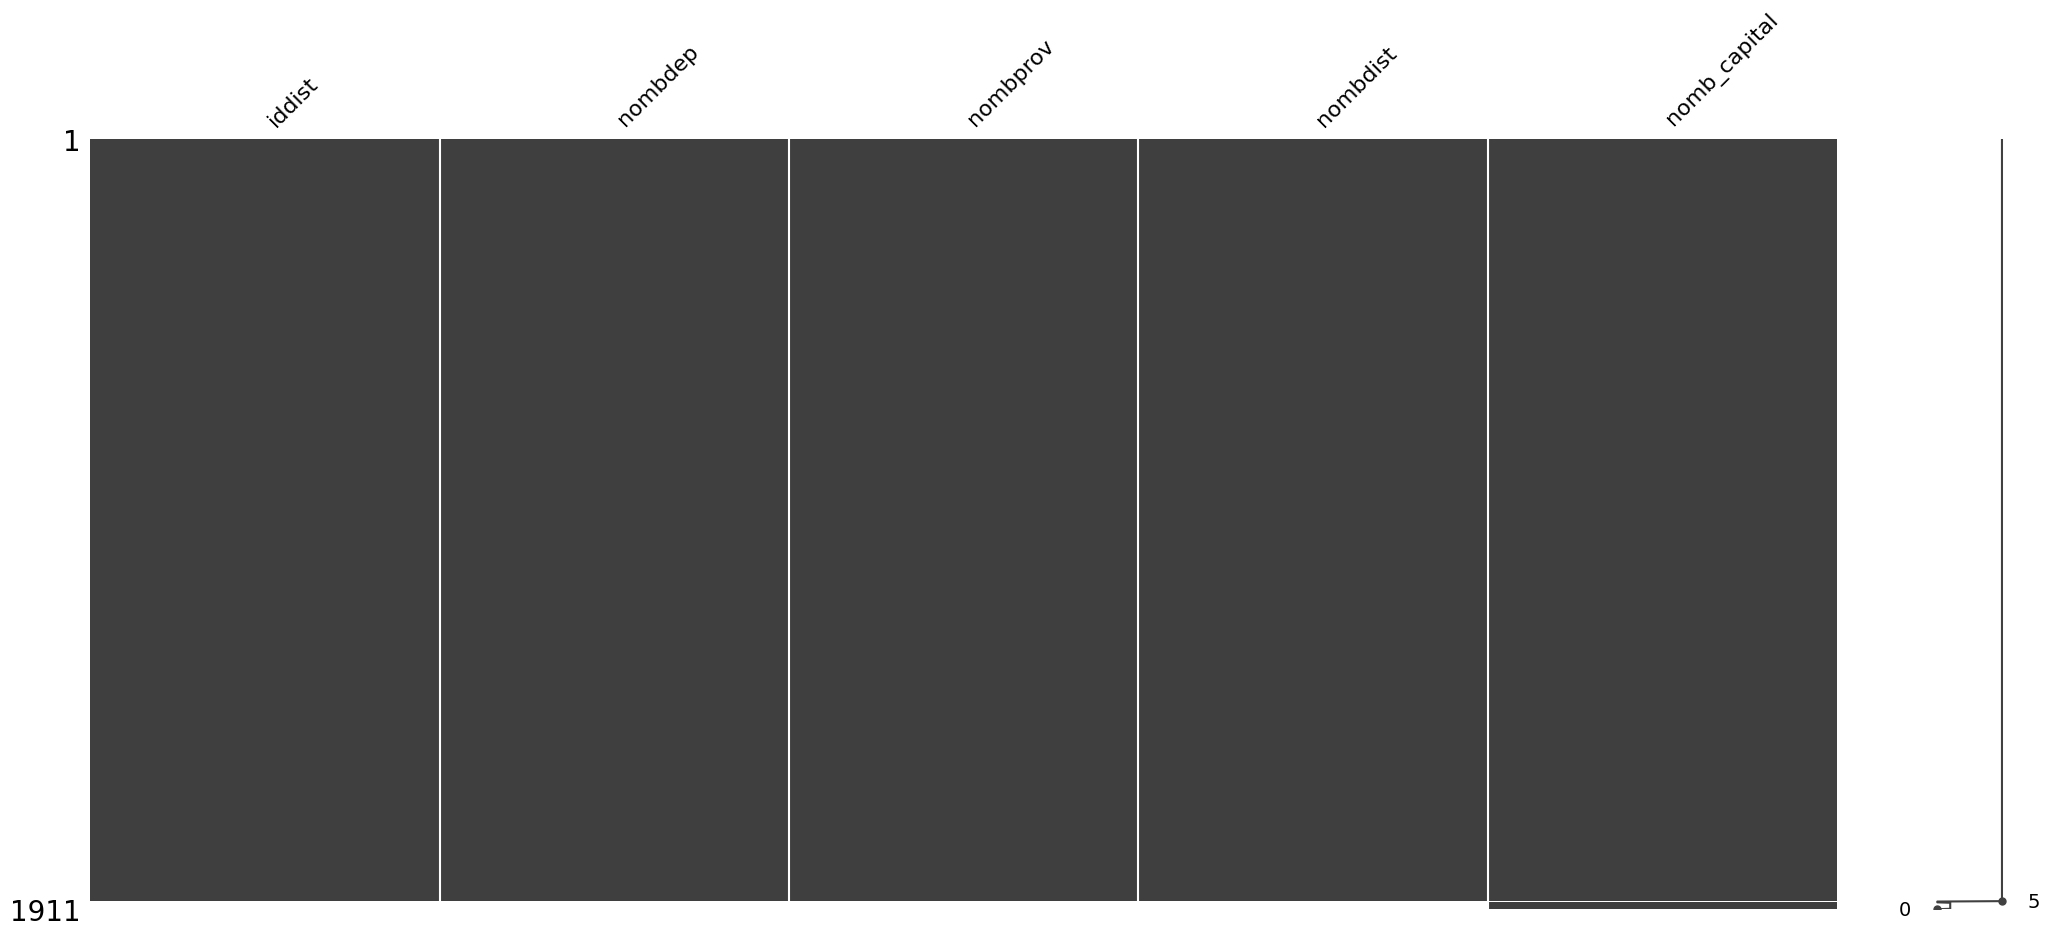

In [ ]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(ubigeo)

In [ ]:
# No grafico anterior é possivel observar que os 20 dados faltantes não possuem iddist, dado importante para fazer o math com o código da cidade/estado do nacimento do atleta
# Portanto, apaguei essas filas

ubigeo = ubigeo.dropna(axis=0, subset=['iddist'])

# contabilizamos a quantidade de dados null por cada coluna
ubigeo.isnull().sum()

iddist          0
nombdep         0
nombprov        0
nombdist        0
nomb_capital    0
dtype: int64

## Linkando os dados dos dataset
Nesta etapa é mudado os nomes das colunas que correspondem as outra tabela para que possam referenciar ataves dos nomes das colunas. Em resumo foi feito o seguinte:

1.   Foi criado o dataset *tab_atletas* a partir do dataset atletas. Para tanto foi selecionado um subconjunto de dados (federacion, paterno,materno, nombres ) que fazem que os dados do atleta pertezcam a um atleta em especifico
2.   Foi criado a coluna id_atleta nos dataset atletas e tab_atletas, uma coluna unica que identifica ao atleta y permitem relacionar as duas tabelas.
3. Na tabela ubigeo foi renomeado a coluna "iddist" por id_ubigeo
4. Na tabela atletas foi renomeado o nome da coluna "ubigeo" por "id_ubigeo"




> **IMPORTANTE** O dataset *participacoes* que tem os dados dos atletas e poderia ter relacionamento com o dataset tab_atletas não foi possivel criar a coluna id_atletas porque os nome e sobrenome do atleta estaba apenas numa coluna.

In [ ]:
#Cria um novo dataset com os dados unicos do atleta
tab_atletas = atletas.drop_duplicates(subset=['federacion', 'paterno', 'materno', 'nombres'])
tab_atletas.head(10)

,anio,mes,federacion,paterno,materno,nombres,pad,nivel,monto,pais,departamento,provincia,distrito,ubigeo
0,2013,1,AJEDREZ,ALIAGA,FERNANDEZ,INGRID YADYRA,I,III,1000.0,PERU,LIMA,LIMA,JESUS MARIA,150113
1,2013,1,AJEDREZ,CABALLERO,QUIJANO,MITZY MISHEL,I,V,600.0,PERU,LIMA,LIMA,LIMA,150101
2,2013,1,AJEDREZ,CHUMPITAZ,CARBAJAL,ANN LINDSAY,I,III,1000.0,PERU,LIMA,LIMA,LA VICTORIA,150115
3,2013,1,AJEDREZ,CORI,QUISPE,KEVIN JOEL,I,V,600.0,PERU,LIMA,LIMA,VILLA EL SALVADOR,150142
4,2013,1,AJEDREZ,CRUZ,SANCHEZ,CRISTHIAN ARNALDO,I,IV,800.0,PERU,LIMA,LIMA,LIMA,150101
5,2013,1,AJEDREZ,CUELLAR,OSHIRO,DIEGO ELISVAN,I,II,1200.0,PERU,CALLAO,CALLAO,CALLAO,70101
6,2013,1,AJEDREZ,ESPINOZA,PALOMINO,WILLYAM JAVIER,I,IV,800.0,PERU,LIMA,LIMA,SAN MIGUEL,150136
7,2013,1,AJEDREZ,FELIX,VEGA,AURORA EDITH,I,II,1200.0,PERU,LIMA,LIMA,JESUS MARIA,150113
8,2013,1,AJEDREZ,FERNANDEZ,PEREZ,JORGE ANDRE,I,IV,800.0,PERU,LIMA,LIMA,JESUS MARIA,150113
9,2013,1,AJEDREZ,GARCIA,CONTRERAS,CRHISTY ANA,I,V,600.0,PERU,LIMA,LIMA,LIMA,150101


In [ ]:
tab_atletas.shape

(1677, 14)

In [ ]:
# Add a unique identifier no dataframe tab_atletas
tab_atletas['id_atleta'] = tab_atletas.groupby(['federacion','paterno','materno','nombres']).ngroup()
tab_atletas.head(10)

,anio,mes,federacion,paterno,materno,nombres,pad,nivel,monto,pais,departamento,provincia,distrito,ubigeo,id_atleta
0,2013,1,AJEDREZ,ALIAGA,FERNANDEZ,INGRID YADYRA,I,III,1000.0,PERU,LIMA,LIMA,JESUS MARIA,150113,8
1,2013,1,AJEDREZ,CABALLERO,QUIJANO,MITZY MISHEL,I,V,600.0,PERU,LIMA,LIMA,LIMA,150101,12
2,2013,1,AJEDREZ,CHUMPITAZ,CARBAJAL,ANN LINDSAY,I,III,1000.0,PERU,LIMA,LIMA,LA VICTORIA,150115,13
3,2013,1,AJEDREZ,CORI,QUISPE,KEVIN JOEL,I,V,600.0,PERU,LIMA,LIMA,VILLA EL SALVADOR,150142,16
4,2013,1,AJEDREZ,CRUZ,SANCHEZ,CRISTHIAN ARNALDO,I,IV,800.0,PERU,LIMA,LIMA,LIMA,150101,21
5,2013,1,AJEDREZ,CUELLAR,OSHIRO,DIEGO ELISVAN,I,II,1200.0,PERU,CALLAO,CALLAO,CALLAO,70101,22
6,2013,1,AJEDREZ,ESPINOZA,PALOMINO,WILLYAM JAVIER,I,IV,800.0,PERU,LIMA,LIMA,SAN MIGUEL,150136,25
7,2013,1,AJEDREZ,FELIX,VEGA,AURORA EDITH,I,II,1200.0,PERU,LIMA,LIMA,JESUS MARIA,150113,26
8,2013,1,AJEDREZ,FERNANDEZ,PEREZ,JORGE ANDRE,I,IV,800.0,PERU,LIMA,LIMA,JESUS MARIA,150113,27
9,2013,1,AJEDREZ,GARCIA,CONTRERAS,CRHISTY ANA,I,V,600.0,PERU,LIMA,LIMA,LIMA,150101,31


In [ ]:
tab_atletas = tab_atletas.drop(columns = ["anio", "mes", "pad","nivel", "monto"])

In [ ]:
atletas['id_atleta'] = atletas.groupby(['federacion','paterno','materno','nombres']).ngroup()
atletas.head(10)

,anio,mes,federacion,paterno,materno,nombres,pad,nivel,monto,pais,departamento,provincia,distrito,ubigeo,id_atleta
0,2013,1,AJEDREZ,ALIAGA,FERNANDEZ,INGRID YADYRA,I,III,1000.0,PERU,LIMA,LIMA,JESUS MARIA,150113,8
1,2013,1,AJEDREZ,CABALLERO,QUIJANO,MITZY MISHEL,I,V,600.0,PERU,LIMA,LIMA,LIMA,150101,12
2,2013,1,AJEDREZ,CHUMPITAZ,CARBAJAL,ANN LINDSAY,I,III,1000.0,PERU,LIMA,LIMA,LA VICTORIA,150115,13
3,2013,1,AJEDREZ,CORI,QUISPE,KEVIN JOEL,I,V,600.0,PERU,LIMA,LIMA,VILLA EL SALVADOR,150142,16
4,2013,1,AJEDREZ,CRUZ,SANCHEZ,CRISTHIAN ARNALDO,I,IV,800.0,PERU,LIMA,LIMA,LIMA,150101,21
5,2013,1,AJEDREZ,CUELLAR,OSHIRO,DIEGO ELISVAN,I,II,1200.0,PERU,CALLAO,CALLAO,CALLAO,70101,22
6,2013,1,AJEDREZ,ESPINOZA,PALOMINO,WILLYAM JAVIER,I,IV,800.0,PERU,LIMA,LIMA,SAN MIGUEL,150136,25
7,2013,1,AJEDREZ,FELIX,VEGA,AURORA EDITH,I,II,1200.0,PERU,LIMA,LIMA,JESUS MARIA,150113,26
8,2013,1,AJEDREZ,FERNANDEZ,PEREZ,JORGE ANDRE,I,IV,800.0,PERU,LIMA,LIMA,JESUS MARIA,150113,27
9,2013,1,AJEDREZ,GARCIA,CONTRERAS,CRHISTY ANA,I,V,600.0,PERU,LIMA,LIMA,LIMA,150101,31


In [ ]:
# Converte o tipo de dado(float64) do dataframe ubigeo da coluna iddist para int64
ubigeo['iddist'] = ubigeo['iddist'].astype('int64')
print(ubigeo.dtypes)


iddist           int64
nombdep         object
nombprov        object
nombdist        object
nomb_capital    object
dtype: object


In [ ]:
# Renomeando a coluna de iddist, de modo a ser o mesmo nome no dataset atletas, para facilitar a chave de mesclagem
ubigeo=ubigeo.rename(columns = {'iddist':'id_ubigeo'})
atletas=atletas.rename(columns = {'ubigeo':'id_ubigeo'})
tab_atletas = tab_atletas.rename(columns = {'ubigeo':'id_ubigeo'})
print(ubigeo)

      id_ubigeo   nombdep     nombprov                nombdist  \
0         10101  AMAZONAS  CHACHAPOYAS             CHACHAPOYAS   
1         10102  AMAZONAS  CHACHAPOYAS                ASUNCION   
2         10103  AMAZONAS  CHACHAPOYAS                  BALSAS   
3         10104  AMAZONAS  CHACHAPOYAS                   CHETO   
4         10105  AMAZONAS  CHACHAPOYAS               CHILIQUIN   
...         ...       ...          ...                     ...   
1886     250304   UCAYALI   PADRE ABAD                 NESHUYA   
1887     250305   UCAYALI   PADRE ABAD  ALEXANDER VON HUMBOLDT   
1888     250306   UCAYALI   PADRE ABAD                 HUIPOCA   
1889     250307   UCAYALI   PADRE ABAD                BOQUERON   
1890     250401   UCAYALI        PURUS                   PURUS   

                nomb_capital  
0                CHACHAPOYAS  
1                   ASUNCION  
2                     BALSAS  
3                      CHETO  
4                  CHILIQUIN  
...                  

## Salva os dataset como csv

Finalmente, é salvo os datasets para serem importados no microsoft Azure

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
participacoes.to_csv('/content/gdrive/My Drive/participacao.csv', index=False)


In [ ]:
ubigeo.to_csv('/content/gdrive/My Drive/ubigeo.csv', index=False)

In [ ]:
atletas.to_csv('/content/gdrive/My Drive/atletas.csv', index=False)

In [ ]:
tab_atletas.to_csv('/content/gdrive/My Drive/tab_atletas.csv', index=False)

Os dados exportados foram salvos no Microsoft Azure, no Data Lake Storage *dlsmvpjessica* e no container *atletasfiles*, como apresenta a imagem a seguir:

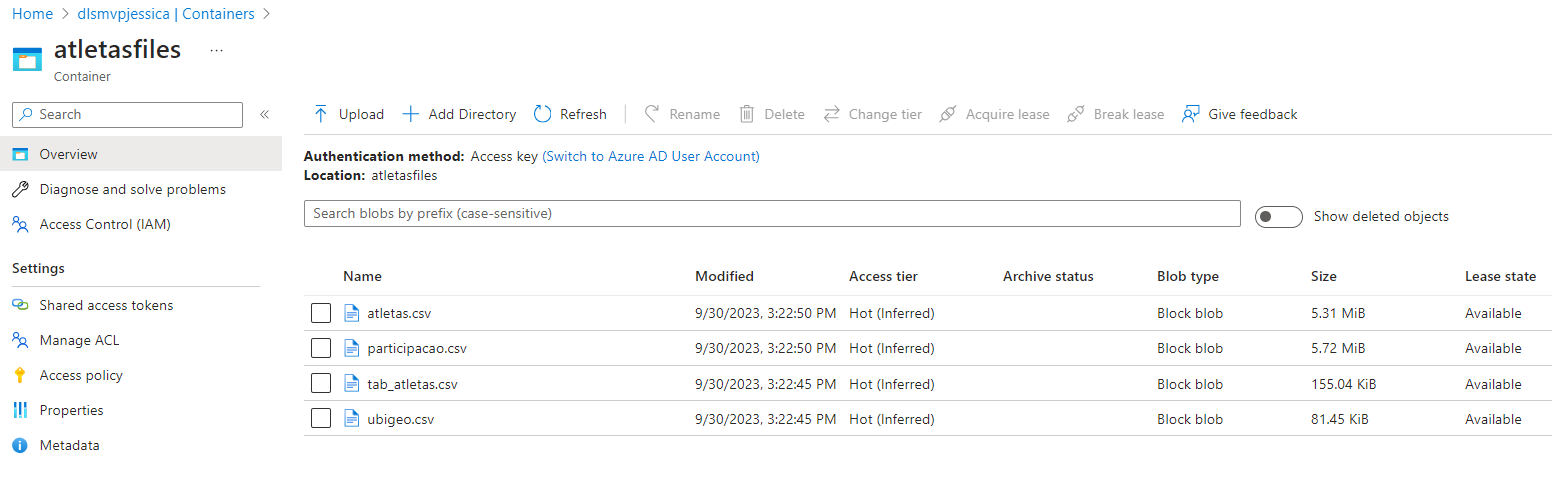

# Seção II: Azure Data Studio e Catalogo de dados

## Azure Data Studio - Breve apresentação teórica

O Azure Data Studio é uma ferramenta da microsoft azure, apoia no gerenciamento de dados de plataforma cruzada, com conectividade com bancos de dados locais e na nuvem populares. O Azure Data Studio oferece suporte ao Windows, ao macOS e ao Linux, com capacidade imediata de conexão ao SQL do Azure e ao SQL Server.

A seguir apresenta-se os principais recursos e funcionalidades do Azure Data Studio:

-  *Editor de Consultas:* Oferece um ambiente de desenvolvimento integrado para escrever consultas SQL, visualizar resultados e depurar código SQL.

-  *Explorador de Bancos de Dados:* Permite navegar e gerenciar bancos de dados, tabelas, procedimentos armazenados, visões e outros objetos de banco de dados.

-  *Integração com Git:* Suporta integração com sistemas de controle de versão Git, o que facilita o rastreamento de mudanças em scripts de banco de dados e consultas.

-  *Extensões:* O Azure Data Studio é altamente extensível por meio de extensões que podem ser instaladas para adicionar funcionalidades adicionais, como suporte a outras linguagens de programação, integração com serviços em nuvem e muito mais.

-  *Suporte a Diversos Sistemas de Banco de Dados:* Além do SQL Server, o Azure Data Studio oferece suporte nativo para vários outros sistemas de gerenciamento de banco de dados, tornando-o uma ferramenta versátil para profissionais que trabalham com diferentes tecnologias de banco de dados.

-  *Dashboards Personalizados:* É possível criar painéis personalizados para monitorar o desempenho e a integridade do banco de dados, bem como configurar alertas.

-   *Integração com o Azure:* Pode ser facilmente integrado ao Azure, a plataforma de nuvem da Microsoft, para facilitar o gerenciamento de bancos de dados na nuvem.

-   *Cross-Platform:* O Azure Data Studio é uma aplicação multiplataforma, o que significa que está disponível para Windows, macOS e Linux.

## Provisionando um Azure SQL Database

Crie o SQL Database: *sqldb-mvp-database* no meu servidor *sql-mvp-server*, como apresentado na figura a seguir:



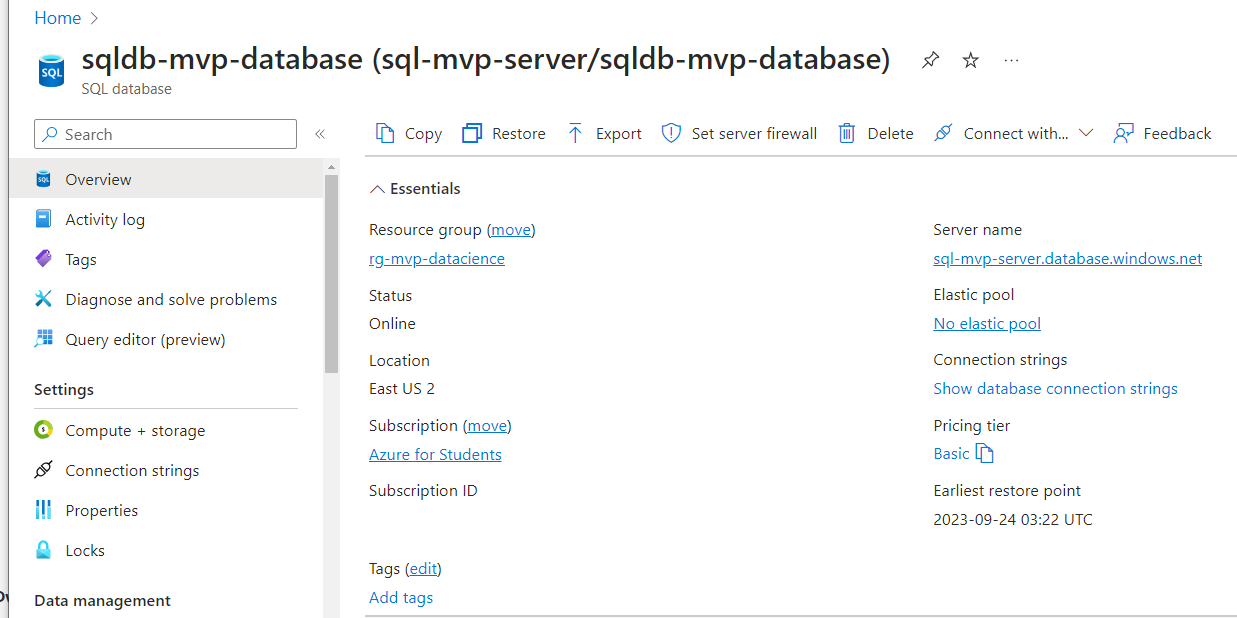

## Coneção ao banco de dados SQL do Azure a partir do Azure Data Studio

Foi realizado a coneção desde o Azure Data Studio para o banco de dados SQL criado no passo anterior, com as configuraçoes apresentadas na imagem a seguir:

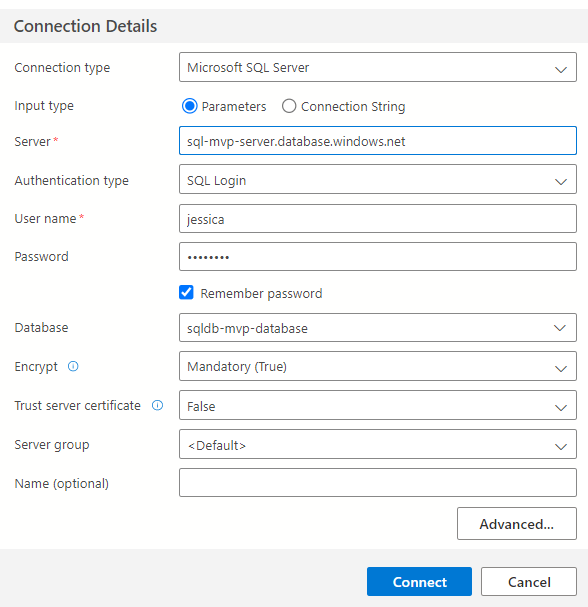

## Importando os dados para o Azure Data Studio

Os dados que foram exportados na seção anterior foram importados para o banco de dados *sqldb-mvp-database* usando o SQL Server Import. A seguir apresenta-se o resultado da importação para tabelas a partir dos arquivos .csv :

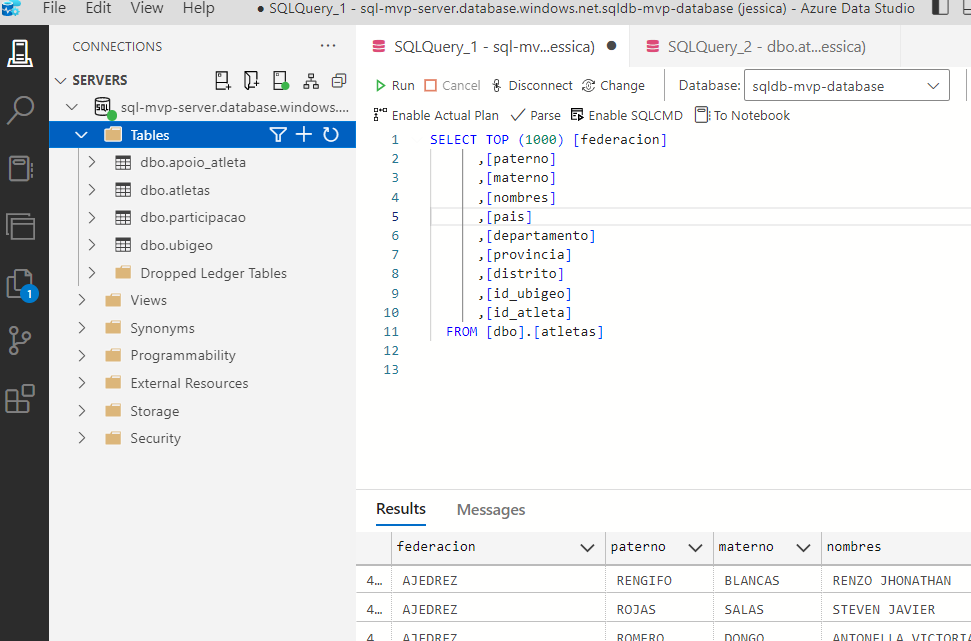

## Catálogo de dados em Azure Purview

Nessa seção será apresentada a criação do catálogo de dados usando Azure Purview. Foi realizado desde o Data Lake e desde SQL Azure Database

> No Azure Purview foi criado o Catálogo de nome *catalogoAtletlasMvp*, com as configuracões a seguir:

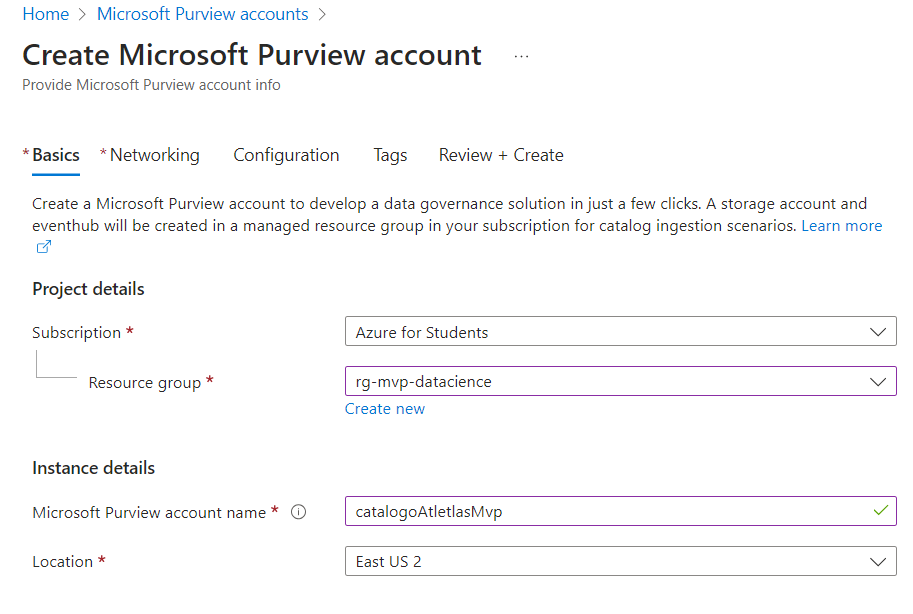

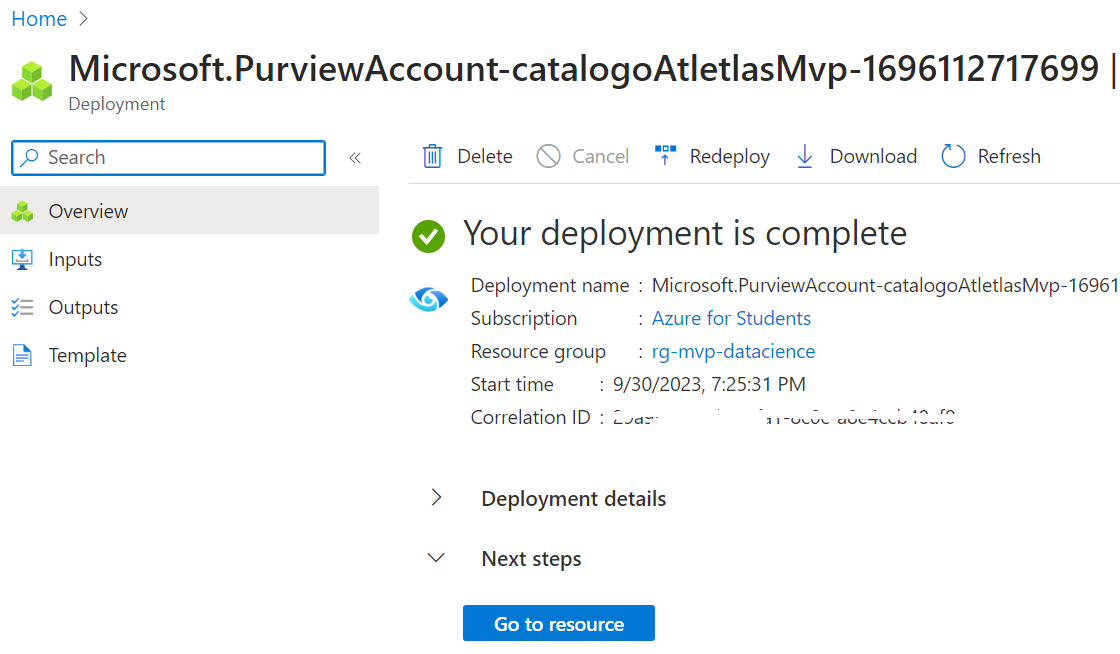

Em seguida no catálogo foram criadas as colecctions BasesSQL e DataLake. A collection BaseSQL faz a coneção com o Azure Data Studio, já a collection DataLake lê os arquivos do Data Lake Storage no Microsoft Azure, no container *atletasfiles*, onde foram salvos os arquivos exportados dos datasets na seção anterior. A seguir apresenta-se a imagem do catálogo de dados apontando para SQL e DataLake:

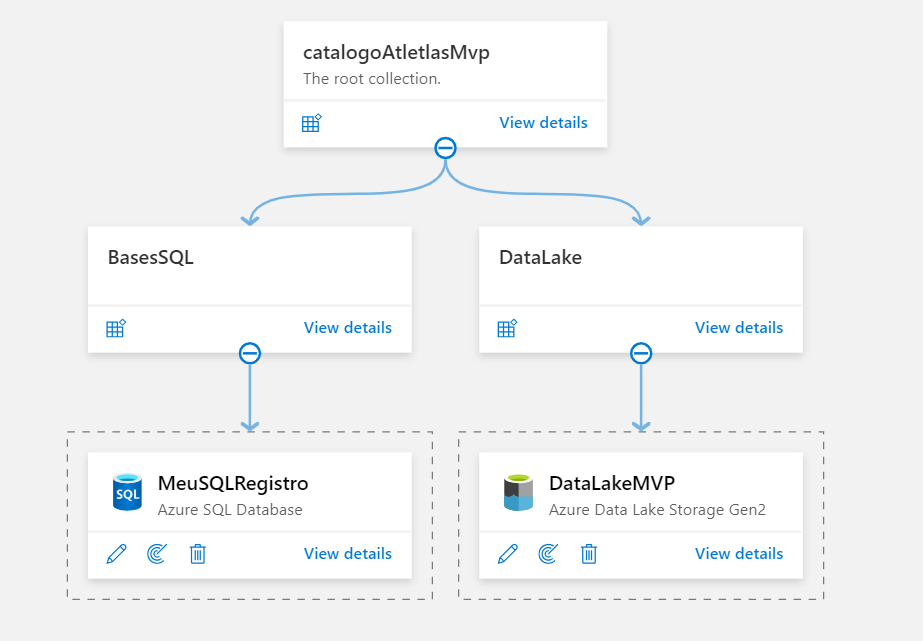

Após feito o scan dos arquivos desde o Purview:

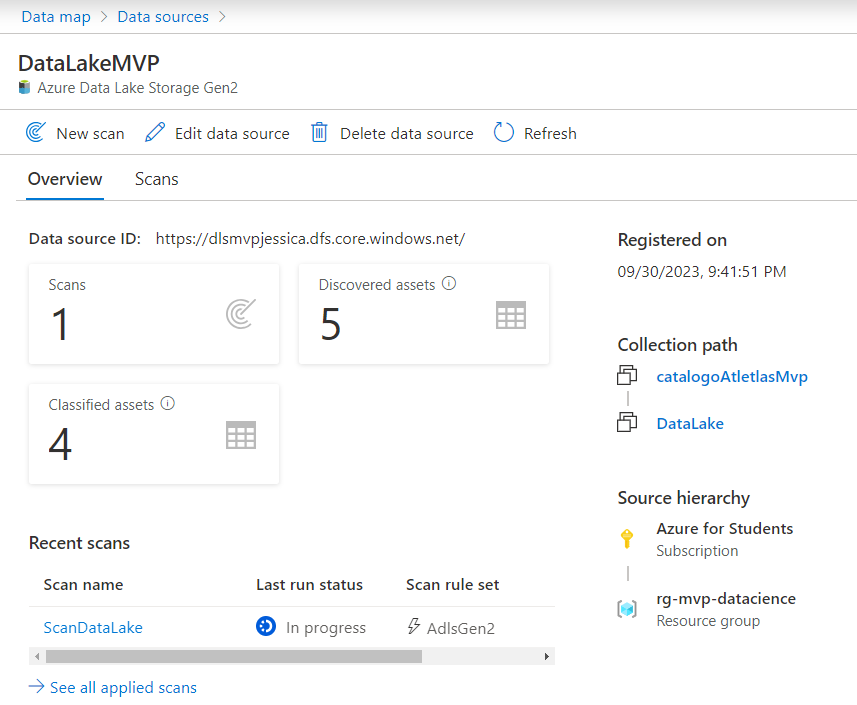

Catálogo da tabela *participação*

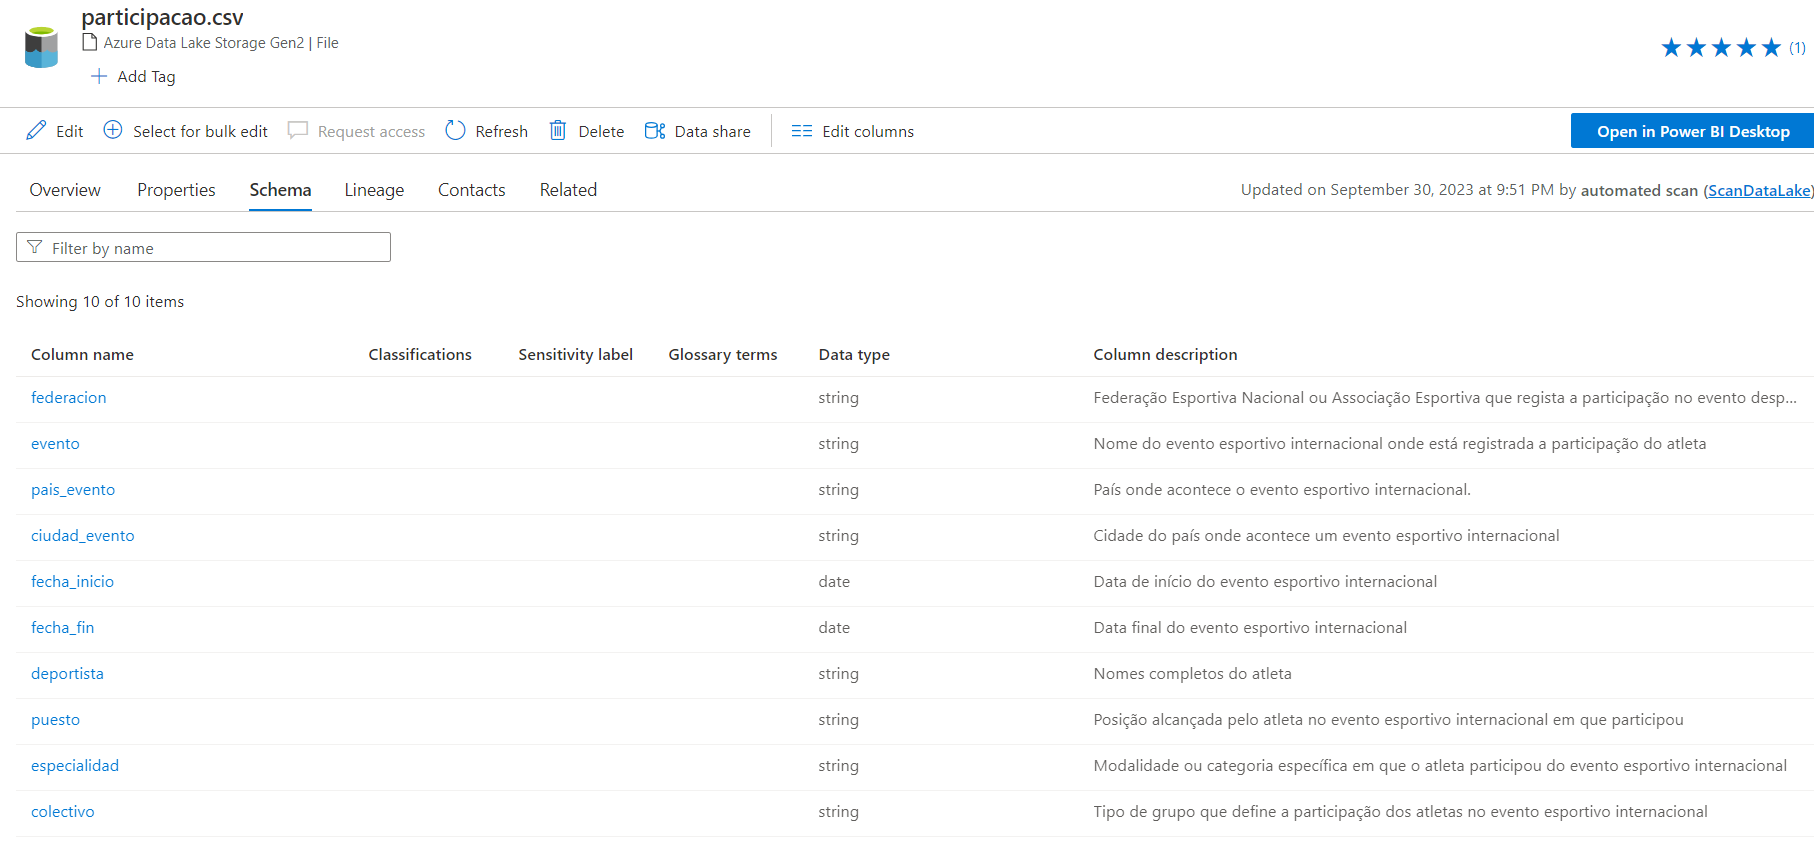

# **Seção III : Análise dos dados**

## Relacionamento entre as tabelas

A seguir apresenta-se o relacionamento emtre as tabelas criadas a partir dos datasets, tambêm é possivel ver o esquema no seguinte [link](https://app.genmymodel.com/api/projects/_hcx9wF4rEe6bquaTqFURaQ/diagrams/_a8FGMELiEDyGPpINjeDSAg/jpeg).


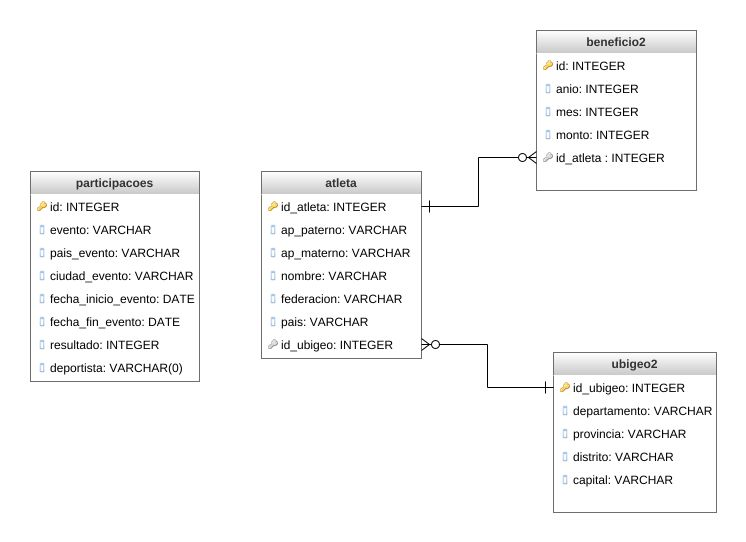

## Análise dos resultados

A partir dos dados importados, dos relacionamentos criados é possível responder às perguntas listadas no início deste trabalho. Isto foi feito usando a lenguagem Transaq SQL no azure Data Studio.

### Número de participações por cada ano

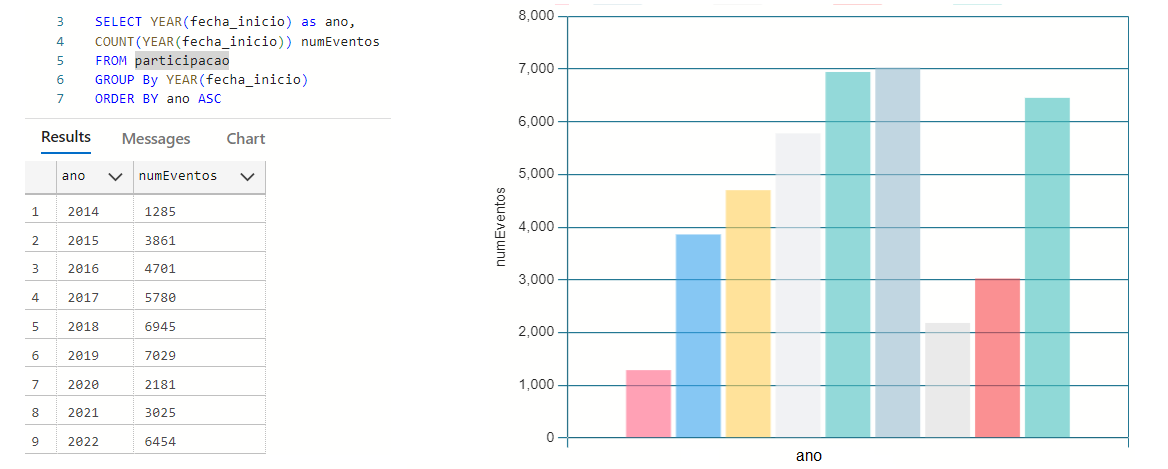


A seguir serão apresentadas as consultas e gráficos correspondentes que atendem a nosas consultas de pesquisa do presente tranalho:

### Quantas medalhas o Peru obtém na participação em competições internacionais?
Considerando que os atletas ganhamas medalhas apenas nas colocações 1,2 ou 3. Foi realizada a consulta apresentada na seguinte imagem para conhecer o número de medalhas obtidas em cada ano pelas participações em eventos esportivos internacionais:  

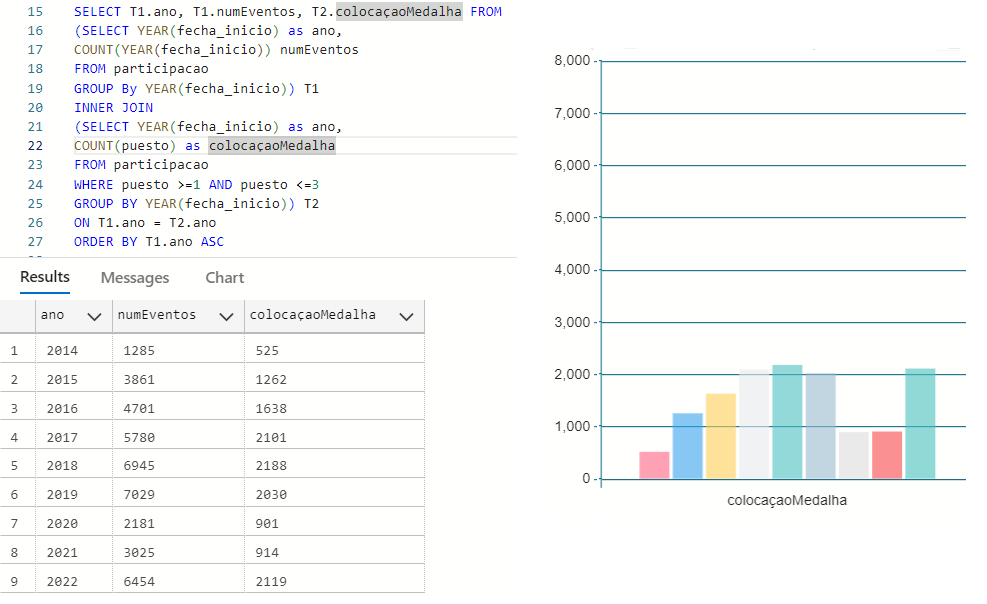

### Quais são os esportes que mais participaram nas competições internacionais?

Os 10 esportes que mais paticiparon em competencias internacionais emtre os anos 2014 e 2022 foram: badminton, Natación y Tenis. A seguir apresenta-se a consulta e representação grágica feito em Azure Data Studio.

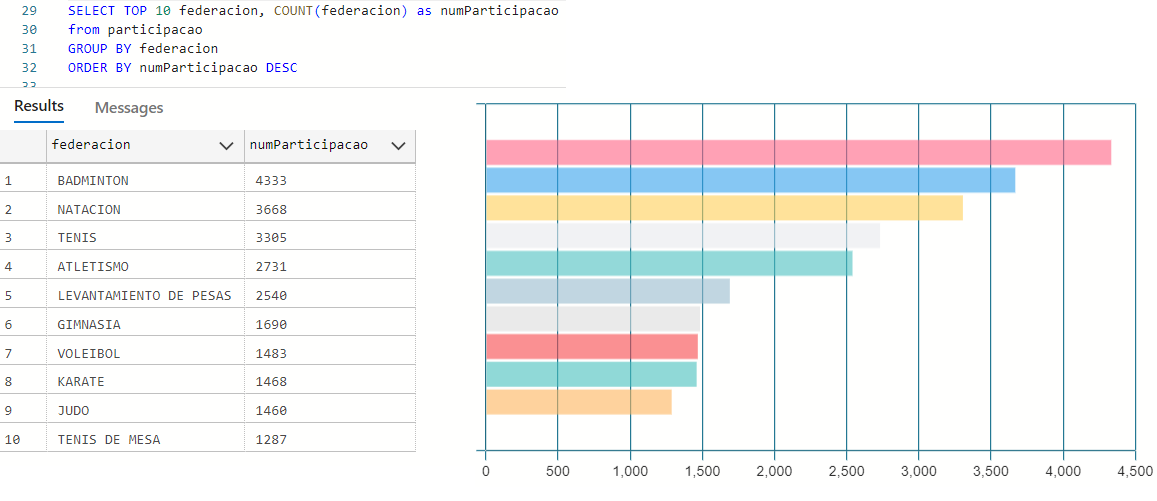

### Qué esportes consigueram conquistar mais medalhas em competições internacionais?

Na seguinte figura pode-se apreciar que o esporte Badminton conquistou o maior número de medalhas em participações internacionais. Em segundo e terceiro lugar encontran-se colocados os esportes de *levantamiento de pesas* e *natacion* respeitivamente.

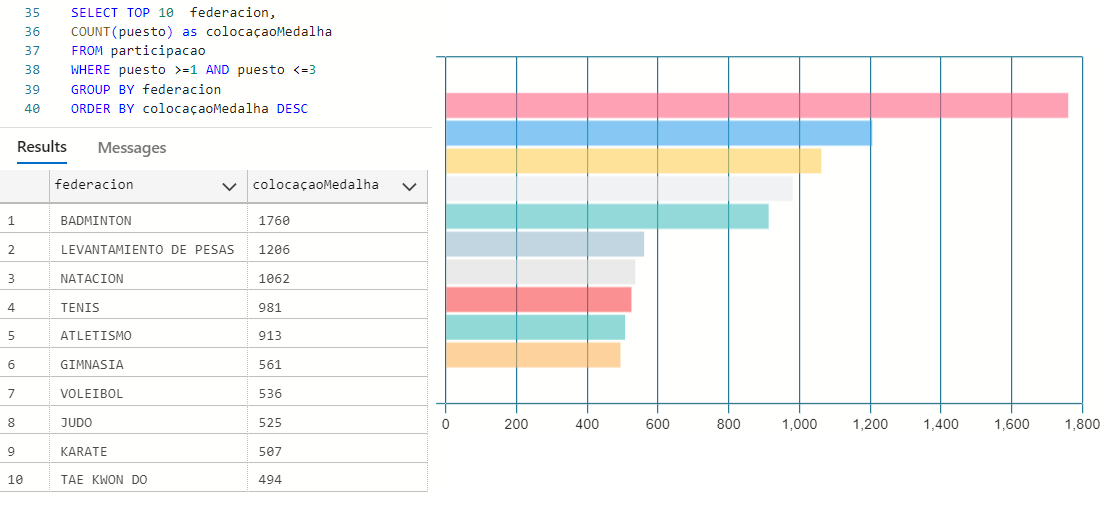

###  Qué esportes receberam maior apoio economico do governo dentre os anos 2014 e 2022?

A seguir apresentanse os esportes que receberam maior apoio do goberno Peruano entre os anos 2014 e 2022. Destaca-se que foi valiadado a condição de anos na consulta, porque o dataset de *apoio_atleta* contem informação entre os anos 2013 e 2023. Ainda na imagem pode-se perceber que os esportes que receberam maios apoio economico foram *Atletismo, Karate e Badminton*.

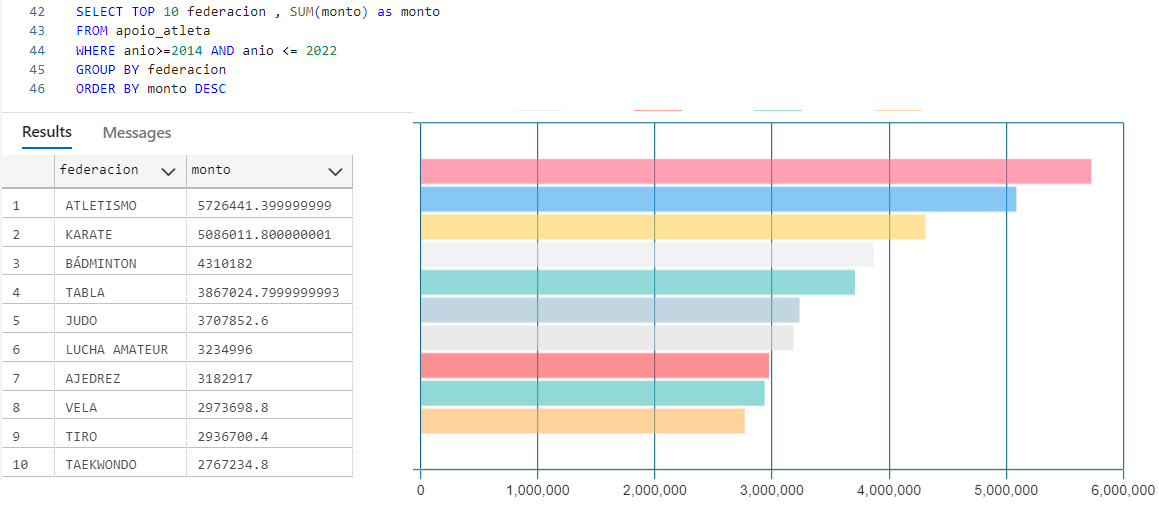

# Conclusão

O presente trabalho teve como objetivo a estruturação de um DataWarehouse utilizando a ferramenta Databricks na nuvem da Microsoft (Azure). Para tal, foram realizadas as etapas referentes à ingestão dos dados obtenção, tratamento e análise dos dados históricos de participaçóes de atletas Peruanos em competencias internacionais e apoio economico aos atletas pelo Governo. Nas etapas iniciais do trabalho, foram elencados os principais passos seguidos para configuração da nuvem.

Os esquemas foram catalogados por meio do Azure Purview, e foi desenvolvido o esquema ETL.

De um modo geral, os dados aquisitados têm sua qualidade (valores numéricos positivos/não-negativos, data coerente, formato de dados coerente). Foi apenas feito a validação da qualidade e remoção de tuplas NaN na etapa de validação de qualidade de dados.

As perguntas desdobradas dos conjuntos de dados e elencadas no início deste trabalho puderam ser facilmente respondidas por meio de consultas realizadas no Azure Data Studio.

